In [44]:
import random
import math
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
x = 1_000_000

In [42]:
# Funkcje analityczne
def analysis(primes):
  df = primes.copy()

  def partitioning(number):
    size = int(x / 100)
    for i in range(1, 101):
      if number > (i - 1) * size and number <= i * size:
        basket = i
        batch = str(((i - 1) * size, i * size))

    return basket, batch

  (df['basket'], df['batch']) = np.vectorize(partitioning)(primes['number'])

  return df

# Dopasowanie liniowe
def linear_regression(x_list, y_list, x_name, y_name, title):
  data = pd.DataFrame()
  data = pd.DataFrame(columns=['x', 'y', 'reg'])
  data['x'] = x_list
  data['y'] = y_list

  min_y = math.floor(data['y'].min())
  max_y = math.floor(data['y'].max()) + 2

  min_x = data['x'].min()
  max_x = data['x'].max() 
  
  a_fin = 0
  b_fin = 0
  sum_fin = 999999999

  for b in range(min_y, max_y):
    for a in range(-101,101):
      a = a / 10
      sum = 0
      for x, y in zip(data['x'], data['y']):
        pred = a * x + b
        diff = abs(y - pred)
        sum = sum + diff
      if sum < sum_fin:
        sum_fin = sum
        a_fin = a
        b_fin = b

  print("Linear regression: a = {}, b = {}".format(round(a_fin,2), round(b_fin,2)))

  reg = []

  for x in data['x']:
    reg.append(a_fin * x + b_fin)

  data['reg'] = reg

  plt.figure(figsize=(15,10))
  plt.title(title)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.xlim(min_x,max_x)
  plt.ylim(min_y,max_y)
  plt.scatter(data['x'], data['y'])
  plt.plot(data['x'], data['reg'])
  plt.legend(['data', 'reg'], loc='upper left')

  return data

In [96]:
# Pętla usuwająca z listy liczby nie-pierwsze
start = time.time()

numbers = list(range(3, x, 2))
limit = (len(numbers)/2 + 1)
for i in numbers:
  for j in numbers:
    if j % i == 0 and i != j:
      numbers.remove(j)
  if i > limit:
    break

numbers = [2] + numbers
finish = time.time()
print("Przeszukiwany zakres: 1 - {}".format(x))
print("Liczb pierwszych: {}".format(len(numbers)))
print("Największa liczba pierwsza: {}".format(numbers[-1]))
print("Czas wykonania: {} sekund".format(round(finish - start, 2)))

# Zapisanie listy liczb pierwszych do ramki danych
primes = pd.DataFrame(columns=['number'])
primes['number'] = numbers

Przeszukiwany zakres: 1 - 1000000
Liczb pierwszych: 78498
Największa liczba pierwsza: 999983
Czas wykonania: 1690.99 sekund


In [53]:
# Rozszerzenie ramki danych o dane analityczne
df = analysis(primes)

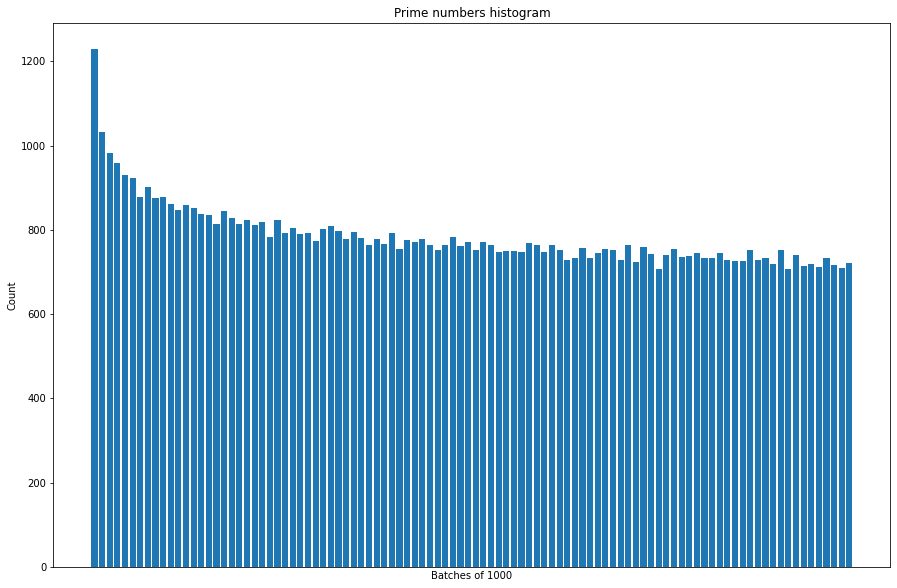

In [54]:
# Histogram wystąpień liczb pierwszych w paczkach kolejnych 1000 liczb
baskets = df.groupby(['basket', 'batch']).size().reset_index(name='counts')

plt.figure(figsize=(15,10))
plt.bar(baskets['batch'], baskets['counts'])

frame1 = plt.gca()
plt.title('Prime numbers histogram')
plt.xlabel('Batches of 1000')
plt.ylabel('Count')
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)

plt.show()

Każdy słupek określa liczbę wystąpień liczb pierwszych w przedziałach 1000 kolejnych liczb (łącznie 100 tysięcy).

Linear regression: a = -1.5, b = 852


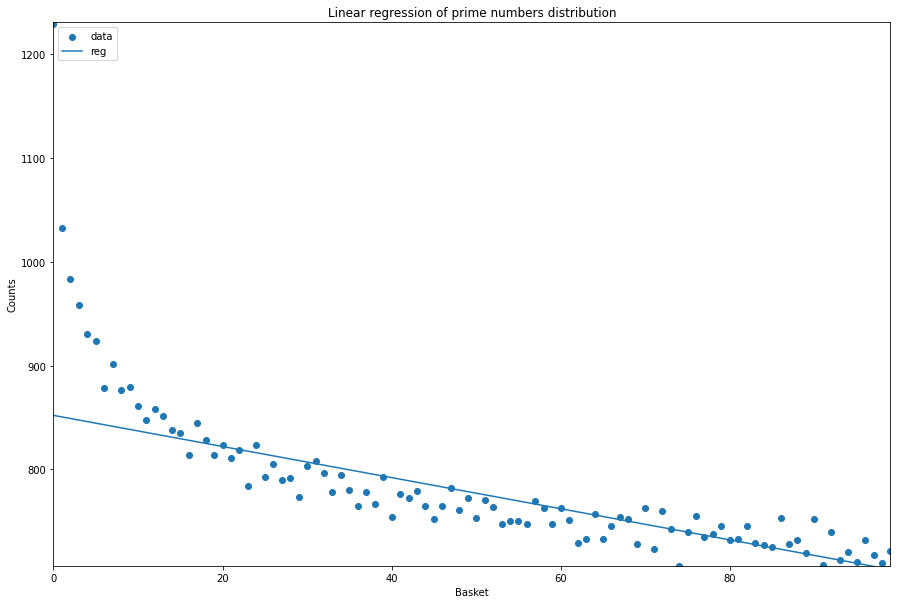

In [55]:
# Regresja liniowa powyższego histogramu
data = linear_regression(list(range(0,len(baskets))), baskets['counts'], 'Basket', 'Counts', 'Linear regression of prime numbers distribution')

Rozkład zliczeń liczb pierwszych w kolejnych przedziałach można aproksymować funkcją liniową o nachyleniu -1,5.

In [57]:
# Delta counting
df['diff'] = 0
for i in range(1, len(df)):
  df.at[i, 'diff'] = df.at[i, 'number'] - df.at[i - 1, 'number']

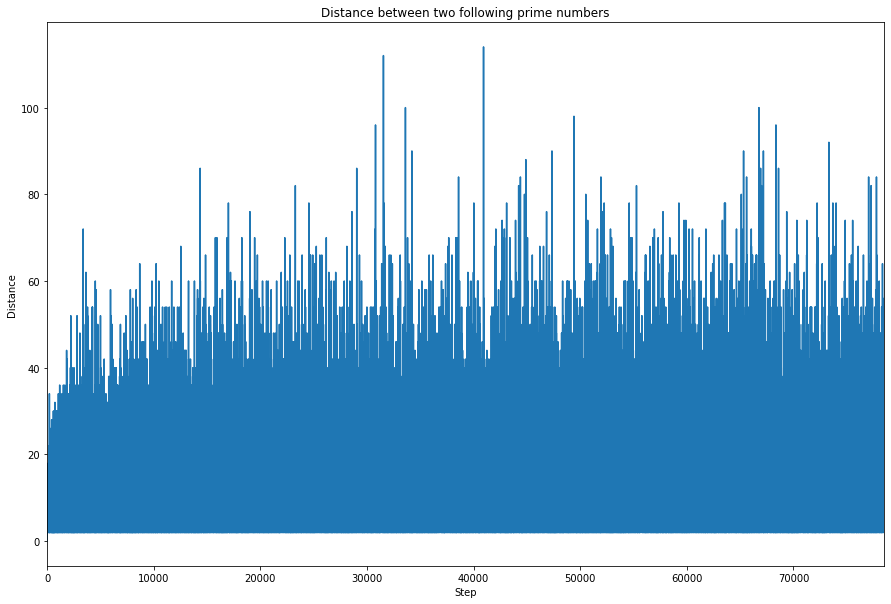

In [70]:
plt.figure(figsize=(15,10))
plt.plot(list(range(0, len(df))), df['diff'])

frame1 = plt.gca()
plt.title('Distance between two following prime numbers')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.xlim(list(range(0, len(df)))[0], list(range(0, len(df)))[-1])
plt.show()

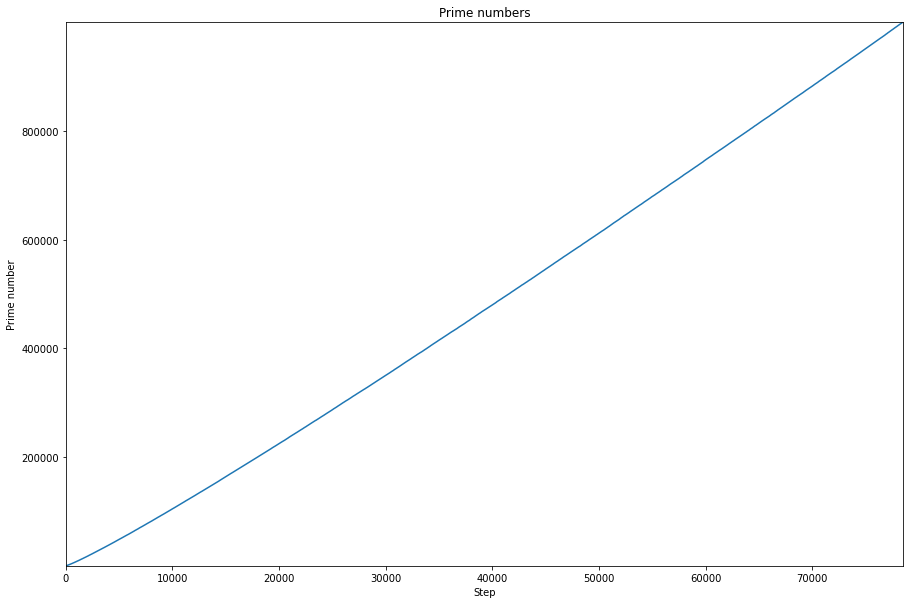

In [76]:
plt.figure(figsize=(15,10))
plt.plot(list(range(0, len(df))), df['number'])

frame1 = plt.gca()
plt.title('Prime numbers')
plt.xlabel('Step')
plt.ylabel('Prime number')
plt.xlim(list(range(0, len(df)))[0], list(range(0, len(df)))[-1])
plt.ylim(df['number'].min(), df['number'].max())
plt.show()